# 543. Diameter of Binary Tree

### Difficulty: <font color = green> Easy </font>

---

Given the `root` of a binary tree, return the *length of the <b>diameter</b> of the tree*.

The diameter of a binary tree is the length of the longest path between any two nodes in a tree. This path may or may not pass through the `root`.

The length of a path between two nodes is represented by the number of edges between them.



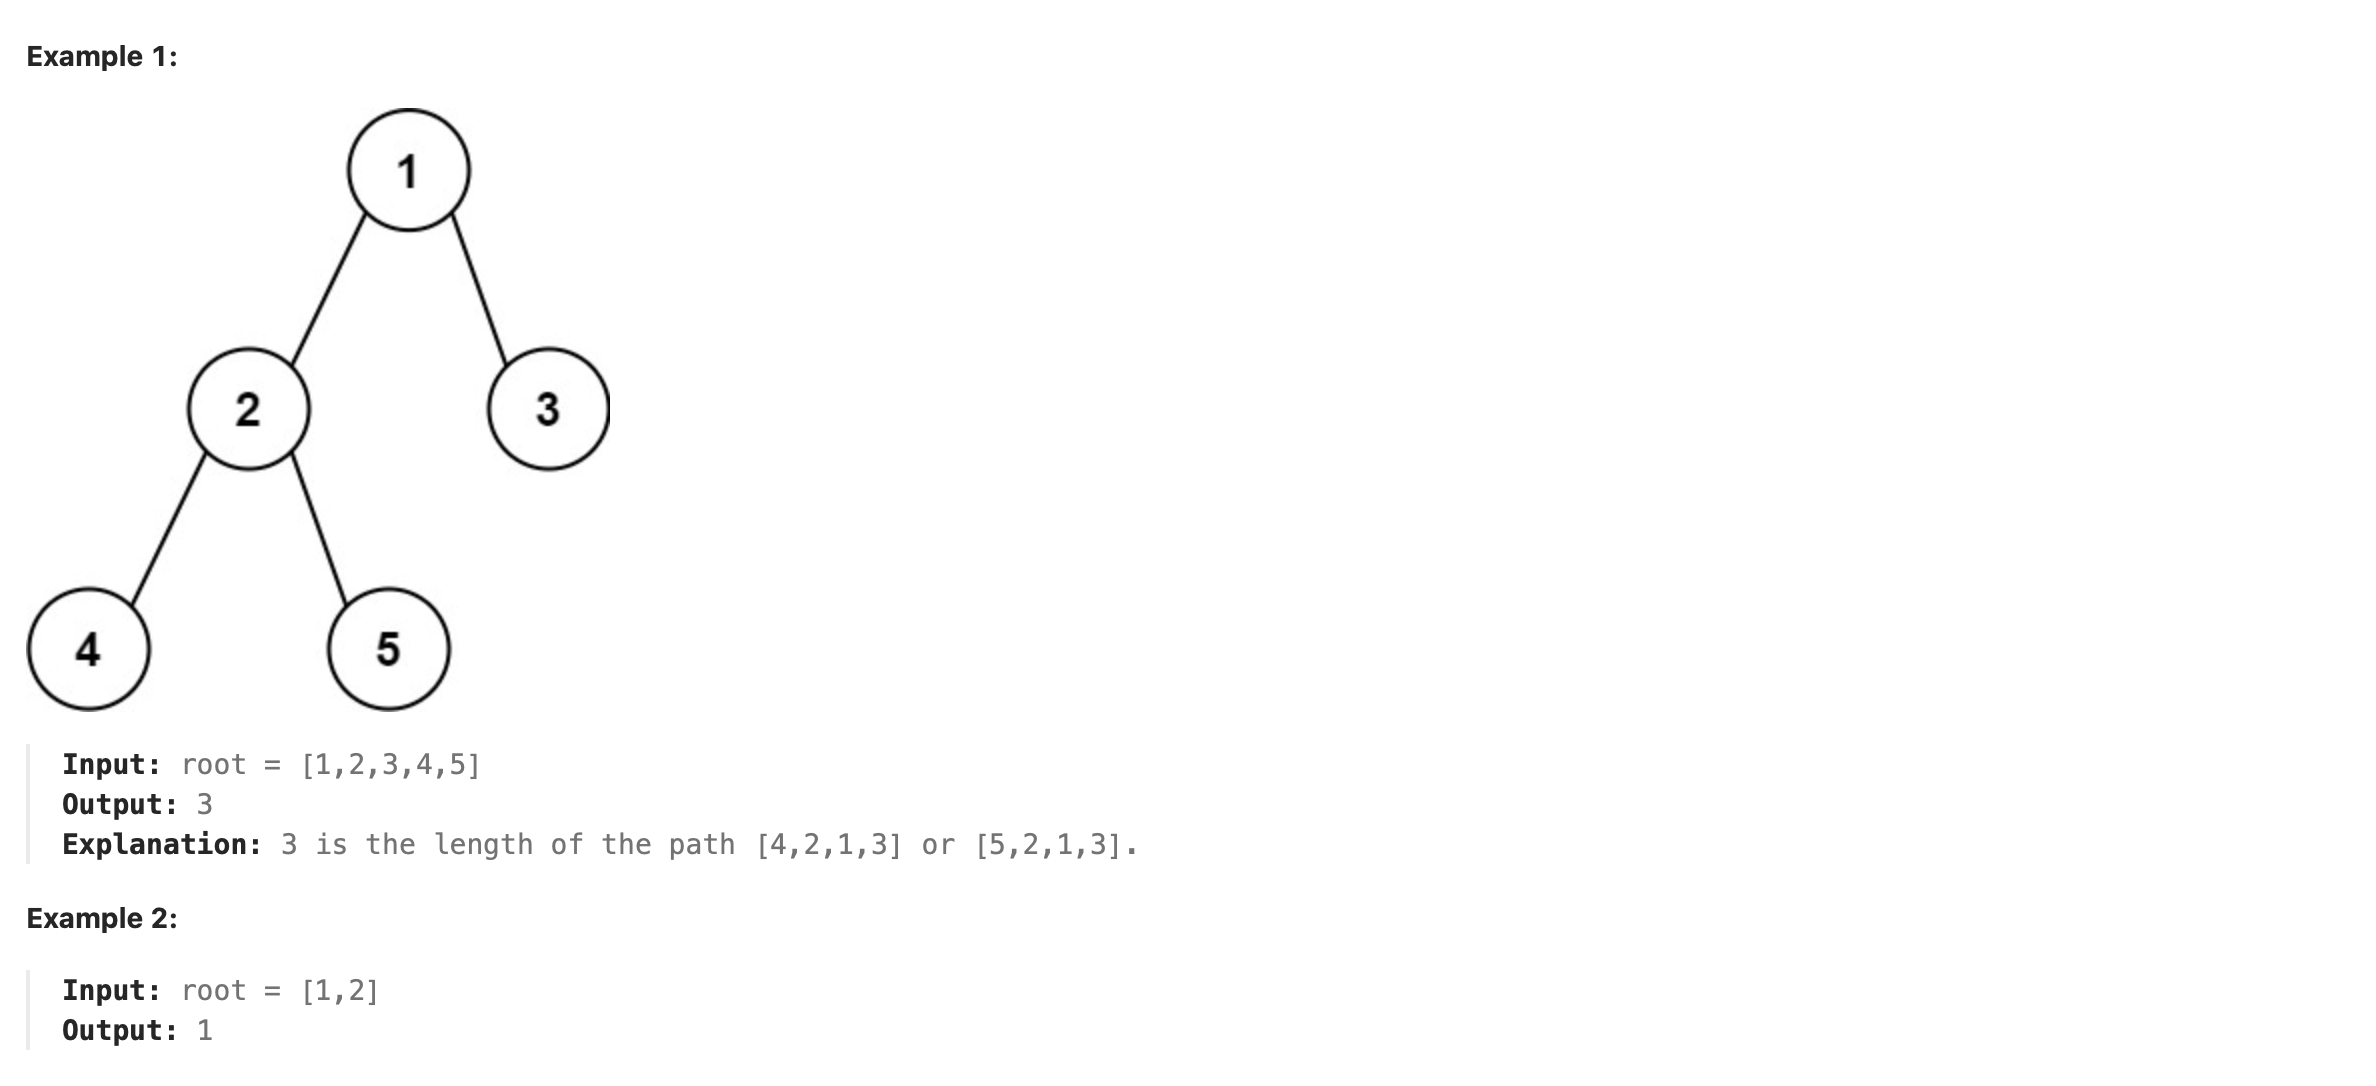

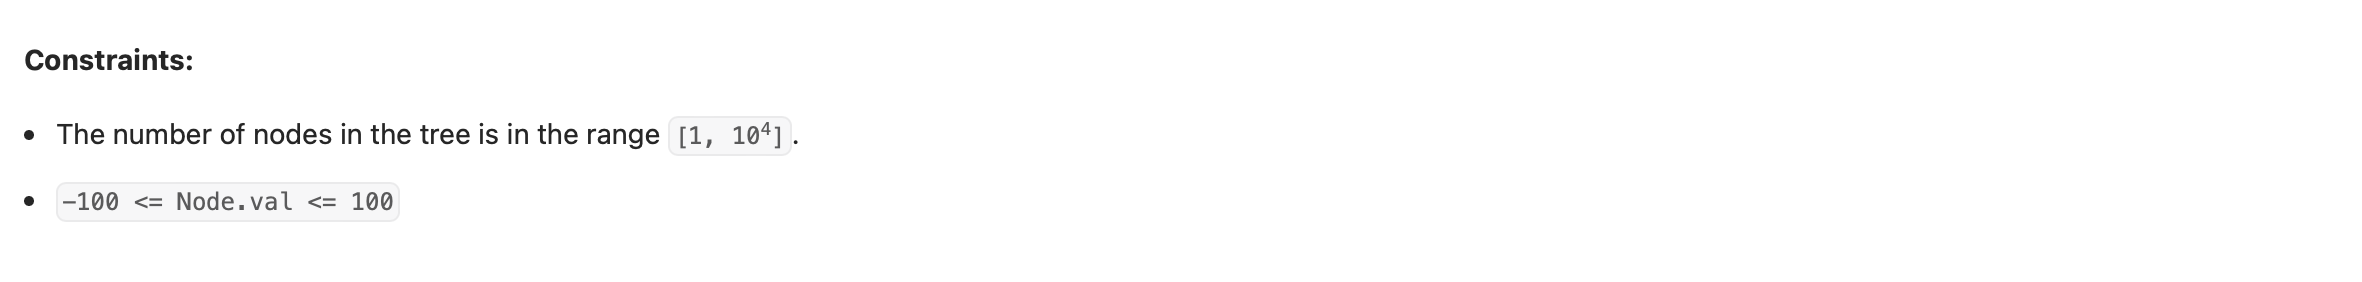

## Approach Overview

Traverse (i.e. go down, across and up) through the binary tree using depth first search. Each time we visit a node, we calculate its diameter (height of its left-subtree + height of its right-subtree) and keep track of the maximum diameter encountered so far.

## Detailed Explanation

This question was quite challenging despite it being an <font color = green> EASY </font> LOL.

So we need to systematically visit all the nodes in the tree. We achieve that using depth first search algo (DFS). 

The DFS algo explores as far as possible along each branch before backtracking. This means that it goes deep into a tree by following a path until it can't go any further, then it backtracks and tries other paths.

Each time we visit a node we calculate its diameter (we're assuming each node we visit is the curving point of a path). But to calculate the diameter we need to firstly find the height of the left-subtree of the node and the height of the right-subtree of the node. So we need to do that.

And this is where depth first search comes in. We recursively run a depth first search algo to recursively find the left and right heights at each node and then use those results to calculate the diameter at that node. We also keep track and update of the largest diameter length we encounter. 

And finally we return the maximum diameter value. 

That's it :)


## Key Challenges

1) Understanding what the hell was going on with this solution. I couldn't understand the exact steps of calculating the diameter because there's different ways we can implement the diameter calculation actually. And I was looking at two different ways of doing it and couldn't get my head around understanding the two methods.

Let's go over the two methods I saw.

### First one


Once we reach the base case (i.e an empty node). We return its height as -1. 

Remember the diameter of a leaf node is 0 (since the height of its subtrees is ZERO / it has no subtrees).

So to make the diameter calculation work out (i.e. so that the diameter of a leaf node adds up to zero).

We add ONE to each of the two subtree height. We add two in total. We add one to the left subtree height (which is -1) and we add one to the right subtree height (which is -1).

What we then return is 1 + (-1) = 0, which is the depth / height of the leaf node.

In [ ]:
def height(root):
    
    if not root:
        return -1
    
    # calculate height of left subtree
    leftHeight = height(root.left)
    
    # calculate height of right subtree
    rightHeight = height(root.right)
    
    # calculate and (potentiallly) update maximum diameter
    diameter = max(diameter, leftHeight + 1 + rightHeight + 1)
    
    # return height of the current node
    return 1 + max(leftHeight, rightHeight)

### Second one

Once we reach the base case (i.e an empty node). We return its height as 0. 

To calculate the diameter of the leaf node we simply add the heights of its left and right subtree together (which are both zero), so the result is ZERO.

We then return (1 + 0) = 1, which is the length of the edge connecting the leaf node to its parent (node above it). 

In [ ]:
def height(root):
    
    # base case
    # once we reach an empty node, return its height as 0
    if not root:
        return 0
    
    # calculate height of left subtree
    leftHeight = height(root.left)
    
    # calculate height of right subtree
    rightHeight = height(root.right)
    
    # calculate and (potentiallly) update maximum diameter
    diameter = max(diameter, leftHeight + rightHeight)
    
    # return height of the current node
    return 1 + max(leftHeight, rightHeight)

## Solution

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

class Solution:


    def diameterOfBinaryTree(self, root: Optional[TreeNode]) -> int:
        
        # initialize a list to keep track of diameter 
        diameter = [0] 
        
        # function to calculate height of the tree 
        def height(root):
            
            # base case
            if not root:    
                return 0
            
            # calculate height of left subtree
            leftHeight = height(root.left) 
            
            # calculate height of right subtree
            rightHeight = height(root.right)

            # calculate the diameter at the current node 
            # update diameter if sum of the heights of left & right subtrees is greater than current value
            diameter[0] = max(diameter[0],leftHeight + rightHeight)
            
            # calculate the height of the current node 
            return 1 + max(leftHeight, rightHeight)
        
        # call height
        height(root)

        # After traversing the entire tree, diameter[0] now holds the maximum diameter
        # so return it :)
        return diameter[0]